# Part I - Prosper Loan Data Analysis 
## by Catherine Nwachukwu

## Introduction
> The Prosper loan data set contains 113,937 loans with 81 variables on each loan, including Prosper Loan Rating, current loan status, borrowers occupation, employment status and many others. To have access to the dataset and data-dictionary, click on this link: [Udacity hosted dataset dataset](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv)




## Preliminary Wrangling

### Pre installation
If this file is being executed for the first time then enable the next three cells

In [1]:
#!pip install squarify

In [2]:
#!pip install pyppeteer

In [3]:
#!jupyter nbconvert --to webpdf --allow-chromium-download Untitled.ipynb

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
from pandas.plotting import table
import squarify

%matplotlib inline

> Having loaded the packages, next step is to import the files to begin data wrangling.

## Analysing the imported dataset

In [5]:
#Importing the csv file and setting the option to view all columns
df = pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns', None)
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [6]:
df.shape

(113937, 81)

> Dataset contains 113,937 loan data with 81 variables

In [7]:
#Getting the data type information on each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
#Checking for duplicated rows
duplicateRows = df[df.duplicated()]
duplicateRows

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [9]:
#There are columns with missing values and it will be summed up to so how many cells in each column have missing values
pd.set_option('display.max_rows',None)
df.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

<AxesSubplot:>

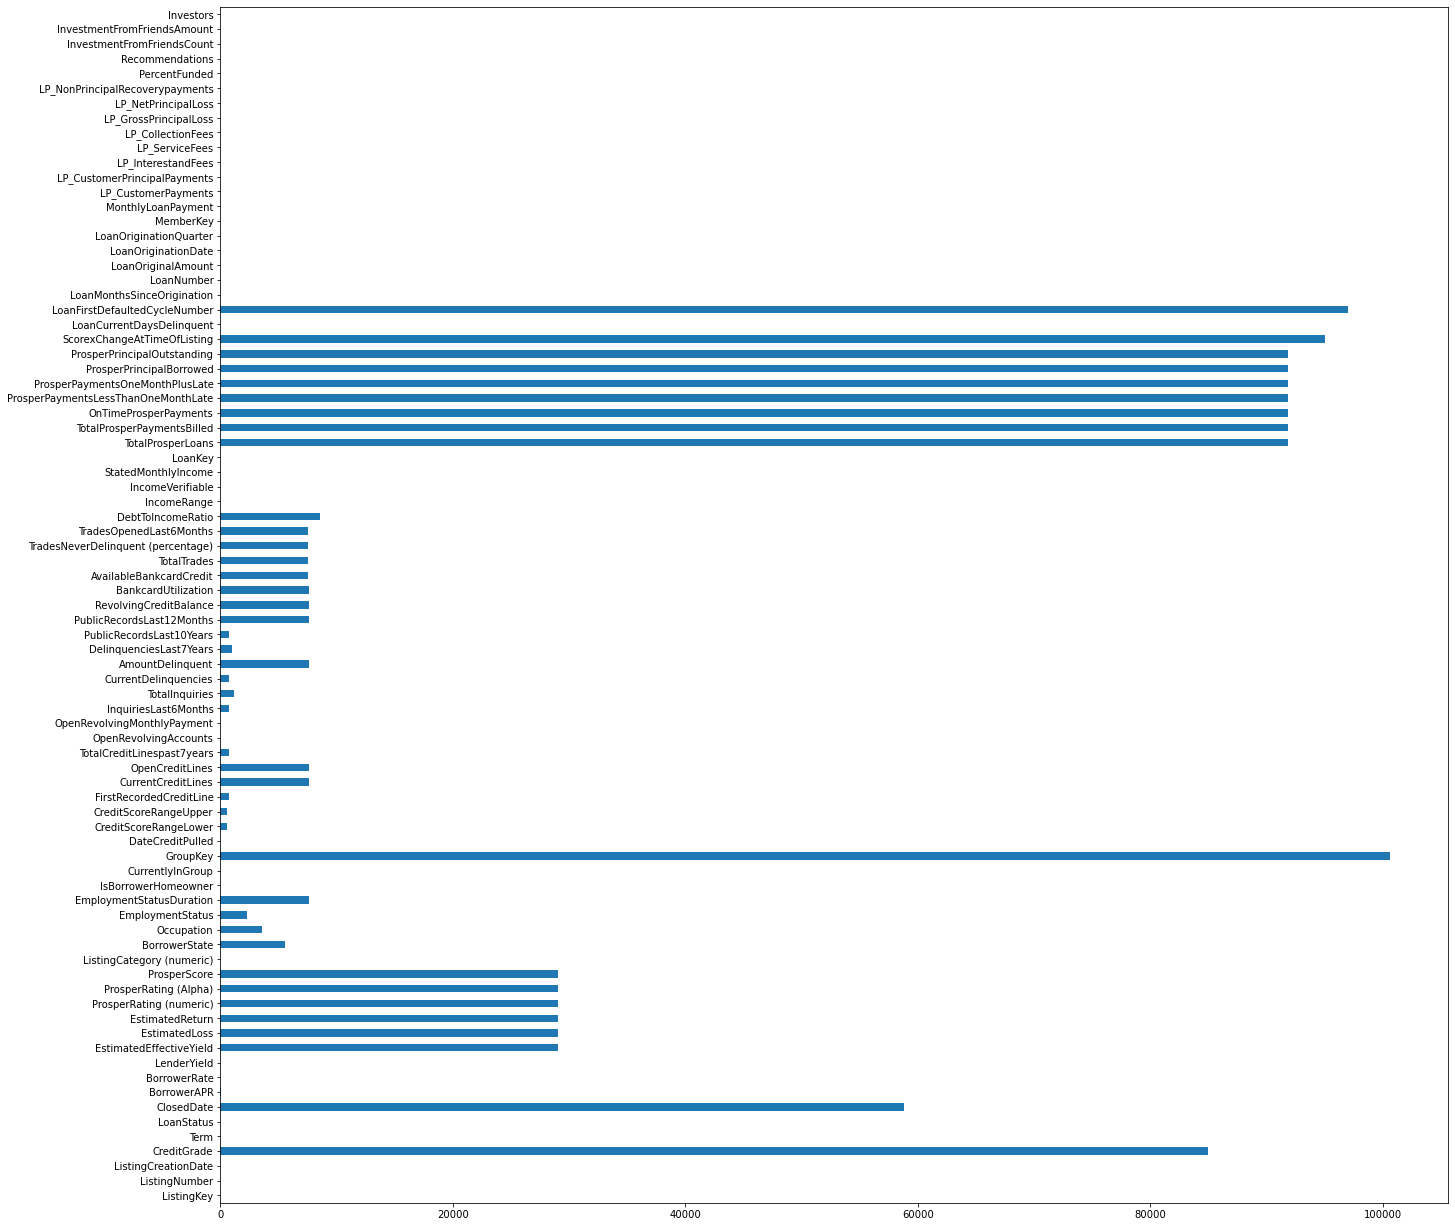

In [10]:
#The summed columns with missing values will be displayed graphically with bar chart
df.isna().sum().plot(kind='barh', figsize=(22,22))

> The above plot shows at a glance the distribution of missiong values for each variables

In [11]:
#There are many columns and its not visible. The next plot will show only columns that contain NaN values
#Creating a list with all the columns containing NaN and an empty dictionary
column_nan_list = df.columns[df.isnull().any()].to_list()
new_nan_dict = {}

#All the columns and their values will be added to the 'new_nan_dict' dictionary
for col in column_nan_list:
    new_nan_dict[col] = df[col].isna().sum()
    
#Putting the dictionary in a DataFrame
df_dict = pd.DataFrame.from_dict(new_nan_dict, orient='index')
df_dict.rename(columns={0 :'Number of missing values'}, inplace=True)
df_dict['Number of missing values in %'] = df_dict['Number of missing values'] / 113936 * 100
df_dict.sort_values("Number of missing values in %", ascending=False)

,Number of missing values,Number of missing values in %
GroupKey,100596,88.291673
LoanFirstDefaultedCycleNumber,96985,85.122349
ScorexChangeAtTimeOfListing,95009,83.388042
ProsperPrincipalOutstanding,91852,80.617189
ProsperPrincipalBorrowed,91852,80.617189
ProsperPaymentsOneMonthPlusLate,91852,80.617189
ProsperPaymentsLessThanOneMonthLate,91852,80.617189
OnTimeProsperPayments,91852,80.617189
TotalProsperPaymentsBilled,91852,80.617189
TotalProsperLoans,91852,80.617189


### Missing Values
The above table shows the percentage of missing values for each variables.

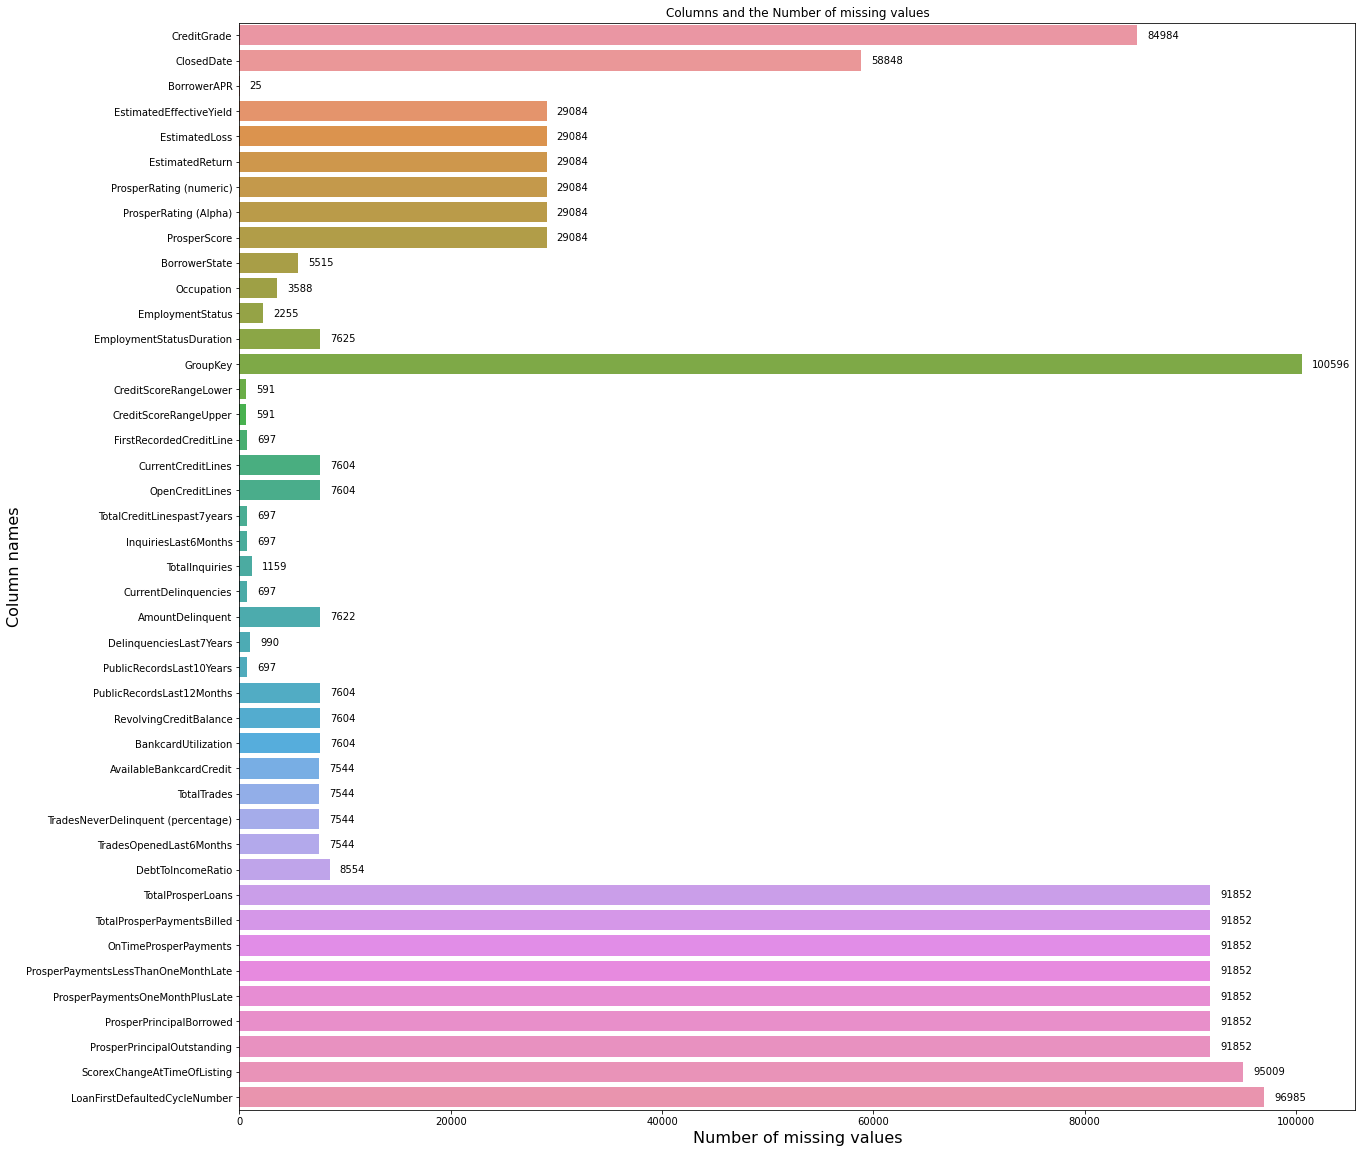

In [12]:
# creating the bar horizontal plot with the column names and the missing values
column_name = list(new_nan_dict.keys())
column_values = list(new_nan_dict.values())

fig, ax = plt.subplots(figsize=(20, 20))
barchart = sb.barplot(x=column_values, y=column_name, estimator=sum, ci=None).set(title='Columns and the Number of missing values')
plt.xlabel("Number of missing values", size=16)
plt.ylabel("Column names", size=16)

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=10)

## Removing all the columns and rows
> All columns with missing values more than 50% will be removed, alongside with multiple columns and rows that have NAN.

In [13]:
# Columns that have over 50% missing values and columns that wont be used for analysis
columns_remove_50 = ["GroupKey", "LoanFirstDefaultedCycleNumber", "ScorexChangeAtTimeOfListing", "ProsperPrincipalOutstanding", 
                  "ProsperPrincipalBorrowed", "ProsperPaymentsOneMonthPlusLate", "ProsperPaymentsLessThanOneMonthLate", 
                 "OnTimeProsperPayments", "TotalProsperPaymentsBilled", "TotalProsperLoans", "CreditGrade", "ClosedDate"]

columns_remove_unwanted = ["ListingCreationDate", 'LenderYield',  'EstimatedEffectiveYield', 'EstimatedLoss',
                        'EstimatedReturn', 'CurrentlyInGroup', 'DateCreditPulled', 'FirstRecordedCreditLine', 'CurrentCreditLines', 
                        'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 
                        'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 
                        'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 
                        'RevolvingCreditBalance', 'AvailableBankcardCredit', 'TotalTrades', "TradesNeverDelinquent (percentage)", 
                        'TradesOpenedLast6Months', 'IncomeVerifiable', 'LoanKey', 'LoanCurrentDaysDelinquent', 
                        'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount', 'LoanOriginationDate', 
                        'LoanOriginationQuarter', 'MemberKey', 'LP_CustomerPayments',
                        'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 
                        'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 
                        'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'BorrowerState']

In [14]:
# Drop multiple columns
df.drop(columns_remove_50, axis = 1, inplace=True)
df.drop(columns_remove_unwanted, axis = 1, inplace=True)
df.head()

,ListingKey,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,BankcardUtilization,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment,Investors
0,1021339766868145413AB3B,193129,36,Completed,0.16516,0.1580,NaN,NaN,NaN,0,Other,Self-employed,2.0,True,640.0,659.0,0.00,0.17,"$25,000-49,999",3083.333333,330.43,258
1,10273602499503308B223C1,1209647,36,Current,0.12016,0.0920,6.0,A,7.0,2,Professional,Employed,44.0,False,680.0,699.0,0.21,0.18,"$50,000-74,999",6125.000000,318.93,1
2,0EE9337825851032864889A,81716,36,Completed,0.28269,0.2750,NaN,NaN,NaN,0,Other,Not available,NaN,False,480.0,499.0,NaN,0.06,Not displayed,2083.333333,123.32,41
3,0EF5356002482715299901A,658116,36,Current,0.12528,0.0974,6.0,A,9.0,16,Skilled Labor,Employed,113.0,True,800.0,819.0,0.04,0.15,"$25,000-49,999",2875.000000,321.45,158
4,0F023589499656230C5E3E2,909464,36,Current,0.24614,0.2085,3.0,D,4.0,2,Executive,Employed,44.0,True,680.0,699.0,0.81,0.26,"$100,000+",9583.333333,563.97,20


In [15]:
# Drop all the rows the has NaN. Since some rows overlap with the missing values, not all columns are specified in the subsets
df.dropna(axis=0, how='any', subset=["BorrowerAPR", "ProsperRating (numeric)", "Occupation", "EmploymentStatusDuration",
                                    "DebtToIncomeRatio"], inplace=True)
df.head()

,ListingKey,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,BankcardUtilization,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment,Investors
1,10273602499503308B223C1,1209647,36,Current,0.12016,0.0920,6.0,A,7.0,2,Professional,Employed,44.0,False,680.0,699.0,0.21,0.18,"$50,000-74,999",6125.000000,318.93,1
3,0EF5356002482715299901A,658116,36,Current,0.12528,0.0974,6.0,A,9.0,16,Skilled Labor,Employed,113.0,True,800.0,819.0,0.04,0.15,"$25,000-49,999",2875.000000,321.45,158
4,0F023589499656230C5E3E2,909464,36,Current,0.24614,0.2085,3.0,D,4.0,2,Executive,Employed,44.0,True,680.0,699.0,0.81,0.26,"$100,000+",9583.333333,563.97,20
5,0F05359734824199381F61D,1074836,60,Current,0.15425,0.1314,5.0,B,10.0,1,Professional,Employed,82.0,True,740.0,759.0,0.39,0.36,"$100,000+",8333.333333,342.37,1
6,0F0A3576754255009D63151,750899,36,Current,0.31032,0.2712,2.0,E,2.0,1,Sales - Retail,Employed,172.0,False,680.0,699.0,0.72,0.27,"$25,000-49,999",2083.333333,122.67,1


In [16]:
# The new structure of the DataFrame
df.shape

(76216, 22)

In [17]:
# Checking whether all NaNs have been removed
df.isna().sum()

ListingKey                   0
ListingNumber                0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
ProsperRating (numeric)      0
ProsperRating (Alpha)        0
ProsperScore                 0
ListingCategory (numeric)    0
Occupation                   0
EmploymentStatus             0
EmploymentStatusDuration     0
IsBorrowerHomeowner          0
CreditScoreRangeLower        0
CreditScoreRangeUpper        0
BankcardUtilization          0
DebtToIncomeRatio            0
IncomeRange                  0
StatedMonthlyIncome          0
MonthlyLoanPayment           0
Investors                    0
dtype: int64

## Reformating columns
> Having observed that some columns have multiple titles and still mean same thing, the duplicated columns will be reformated.

In [18]:
# The new data frame is viewed again under df.info() and the possible data types of the columns are changed to a suitable data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingKey                 76216 non-null  object 
 1   ListingNumber              76216 non-null  int64  
 2   Term                       76216 non-null  int64  
 3   LoanStatus                 76216 non-null  object 
 4   BorrowerAPR                76216 non-null  float64
 5   BorrowerRate               76216 non-null  float64
 6   ProsperRating (numeric)    76216 non-null  float64
 7   ProsperRating (Alpha)      76216 non-null  object 
 8   ProsperScore               76216 non-null  float64
 9   ListingCategory (numeric)  76216 non-null  int64  
 10  Occupation                 76216 non-null  object 
 11  EmploymentStatus           76216 non-null  object 
 12  EmploymentStatusDuration   76216 non-null  float64
 13  IsBorrowerHomeowner        76216 non-null  bo

In [19]:
# Many of the professions have similar or identical names with subgroups. From this group, for a better grouping during the analysis, the professions are changed to a unified naming
df['Occupation'][df.Occupation.str.contains('Student')] = 'Student'
df['Occupation'][df.Occupation.str.contains('Tradesman')] = 'Tradesman'
df['Occupation'][df.Occupation.str.contains('Engineer')] = 'Engineer'
df['Occupation'][df.Occupation.str.contains('Nurse')] = 'Nurse'
df['Occupation'][df.Occupation.str.contains('Pilot')] = 'Pilot'
df['Occupation'][df.Occupation.str.contains('Police')] = 'Police'
df['Occupation'][df.Occupation.str.contains('Sales')] = 'Sales'
df['Occupation'][df.Occupation.str.contains('Teacher')] = 'Teacher'

/var/folders/v9/dgjr19g14zn0x6jrrgj0_c_80000gn/T/ipykernel_4255/2100803629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'][df.Occupation.str.contains('Student')] = 'Student'
/var/folders/v9/dgjr19g14zn0x6jrrgj0_c_80000gn/T/ipykernel_4255/2100803629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'][df.Occupation.str.contains('Tradesman')] = 'Tradesman'
/var/folders/v9/dgjr19g14zn0x6jrrgj0_c_80000gn/T/ipykernel_4255/2100803629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

### Here the columns are converted to the appropriate data types. In addition to the Integer, Float and Object data types, the "Category" data type is also used for columns with a limited selection, e.g. Loan Status. With the Category data type, performance becomes more efficient with such a large amount of data

In [20]:
# Loan status data type will be changed to "category"
df["LoanStatus"] = df["LoanStatus"].astype('category')

In [21]:
# The dollar sign is removed and this column is also converted to "category"
df["IncomeRange"] = df["IncomeRange"].str.strip("$")
df["IncomeRange"] = df["IncomeRange"].astype('category')

In [22]:
# EmploymentStatus data type will be changed to "category"
df["EmploymentStatus"] = df["EmploymentStatus"].astype('category') 

In [23]:
# ProsperRating (Alpha) data type will be changed to "category"
df["ProsperRating (Alpha)"] = df["ProsperRating (Alpha)"].astype('category')

In [24]:
# ProsperRating (numeric) data type will be changed to "int"
df["ProsperRating (numeric)"] = df["ProsperRating (numeric)"].astype('int')

### The data types of the columns are checked one last time. If all conversions are correct, the dataset is saved

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ListingKey                 76216 non-null  object  
 1   ListingNumber              76216 non-null  int64   
 2   Term                       76216 non-null  int64   
 3   LoanStatus                 76216 non-null  category
 4   BorrowerAPR                76216 non-null  float64 
 5   BorrowerRate               76216 non-null  float64 
 6   ProsperRating (numeric)    76216 non-null  int64   
 7   ProsperRating (Alpha)      76216 non-null  category
 8   ProsperScore               76216 non-null  float64 
 9   ListingCategory (numeric)  76216 non-null  int64   
 10  Occupation                 76216 non-null  object  
 11  EmploymentStatus           76216 non-null  category
 12  EmploymentStatusDuration   76216 non-null  float64 
 13  IsBorrowerHomeowner        762

In [26]:
df.head()

,ListingKey,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,BankcardUtilization,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment,Investors
1,10273602499503308B223C1,1209647,36,Current,0.12016,0.0920,6,A,7.0,2,Professional,Employed,44.0,False,680.0,699.0,0.21,0.18,"50,000-74,999",6125.000000,318.93,1
3,0EF5356002482715299901A,658116,36,Current,0.12528,0.0974,6,A,9.0,16,Skilled Labor,Employed,113.0,True,800.0,819.0,0.04,0.15,"25,000-49,999",2875.000000,321.45,158
4,0F023589499656230C5E3E2,909464,36,Current,0.24614,0.2085,3,D,4.0,2,Executive,Employed,44.0,True,680.0,699.0,0.81,0.26,"100,000+",9583.333333,563.97,20
5,0F05359734824199381F61D,1074836,60,Current,0.15425,0.1314,5,B,10.0,1,Professional,Employed,82.0,True,740.0,759.0,0.39,0.36,"100,000+",8333.333333,342.37,1
6,0F0A3576754255009D63151,750899,36,Current,0.31032,0.2712,2,E,2.0,1,Sales,Employed,172.0,False,680.0,699.0,0.72,0.27,"25,000-49,999",2083.333333,122.67,1


In [27]:
df.to_csv("prosperLoanData_cleaned.csv", encoding='utf-8', index=False)

### What is the structure of your dataset?

> The "prosperLoanData.csv" file consists of 113937 rows and 81 columns, which means data from 113937 borrowers was extracted on the basis of 81 features. 

> For the analysis and especially for the computing capacity, some columns are removed and the features used are now these: ListingKey, ListingNumber, Term, LoanStatus, BorrowerAPR, BorrowerRate, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric ), Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CreditScoreRangeLower, CreditScoreRangeUpper, BankcardUtilization, DebtToIncomeRatio, IncomeRange, StatedMonthlyIncome, MonthlyLoanPayment, and Investors. 

> The data types of some columns such as: LoanStatus, ProsperRating (Alpha) or IncomeRange had to be converted from "String" to "Category

### What is/are the main feature(s) of interest in your dataset?

> From the dataset, The main features of interest are:
-  The distrubtion of browers across their propser rating (Alpha)
-  The employment Stastics of the borrowers with the highest rating, 
- Professions and employment status of the browers that falls into the largest proper rating group

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> An important feature will be the "ProsperRating (Alpha)" because the borrower received the rating there. This feature can then be broken down into items such as: "All borrowers that fall within the "C" rating classification". Furthermore, the:

> "Loan Status": Is the loan still open or will the payments be made on time? Is the borrower already in arrears with payments or has the loan already defaulted?

> "Occupation": What is the occupation of the borrower

> "EmploymentStatus": Whether the borrower has an employer and therefore receives a monthly salary

> "EmploymentStatusDuration": How long the employee has been employed by the employer

> "IsBorrowerHomeowner": Whether a property can be deposited as a reserve

> "IncomeRange": In which salary range the borrower falls

> "StatedMonthlyIncome": The monthly salary

> "MonthlyLoanPayment": The monthly loan installment

> ...play an important role in the analysis. In the course of the analysis, further features can be added if they are considered important

## Univariate Exploration

> One of the most important factors in borrowing is the rating. Depending on the rating, it is decided how high the interest repayment will be. The credit rating classification is also an indicator that the borrower is either highly likely to be able to repay the loan or is highly likely to default on the loan. Taken from this basis, the first factor of the analysis will be the "Prosper Rating (Alpha)".


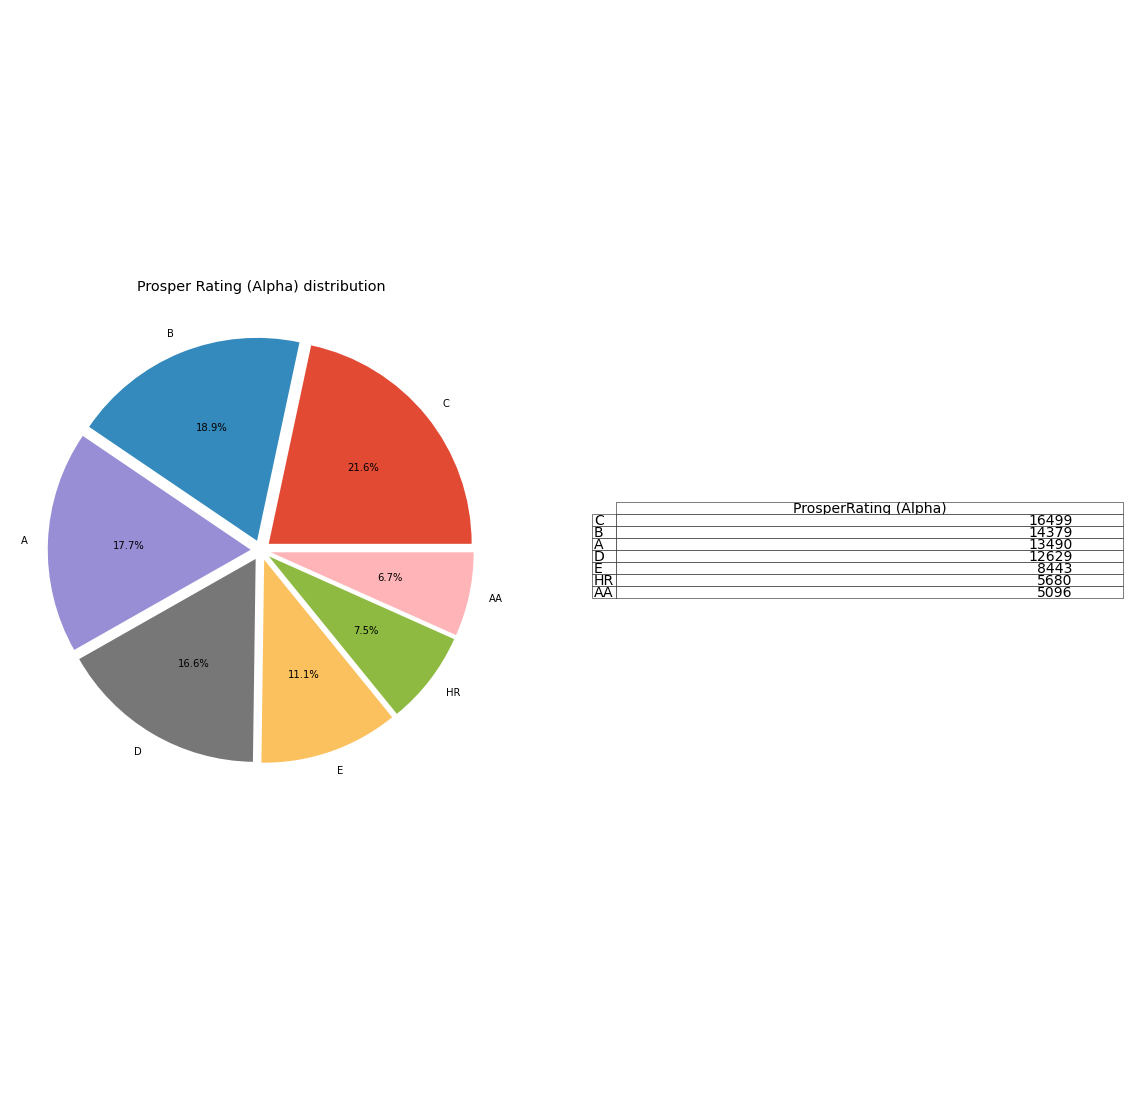

In [28]:
# The first consideration analyzes which rating was given most frequently
plt.style.use('ggplot')
ax = plt.subplot(121, aspect='equal')
plt.axis('off')
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
ax = df["ProsperRating (Alpha)"].value_counts().plot.pie(figsize=(20, 20), autopct='%1.1f%%', explode=explode)
ax.set_title("Prosper Rating (Alpha) distribution")

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=10)
    
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df["ProsperRating (Alpha)"].value_counts(), loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()

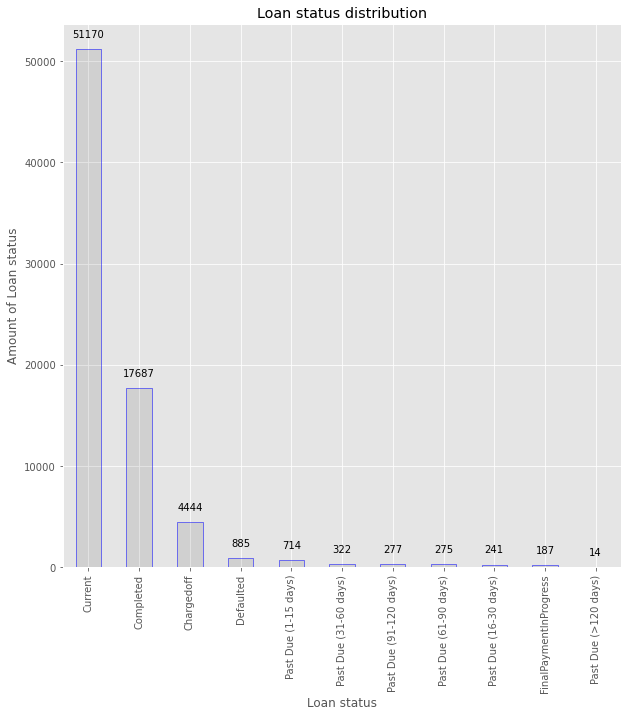

In [29]:
# Barplot
# In order to be able to successfully repay a loan, only the rating is enough, but also the monthly income. Here it is considered whether the borrower is employed
plt.style.use('ggplot')
ax = df["LoanStatus"].value_counts().plot.bar(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue', figsize=(10, 10))
ax.set_xlabel("Loan status")
ax.set_ylabel("Amount of Loan status")
ax.set_title("Loan status distribution")

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=10)

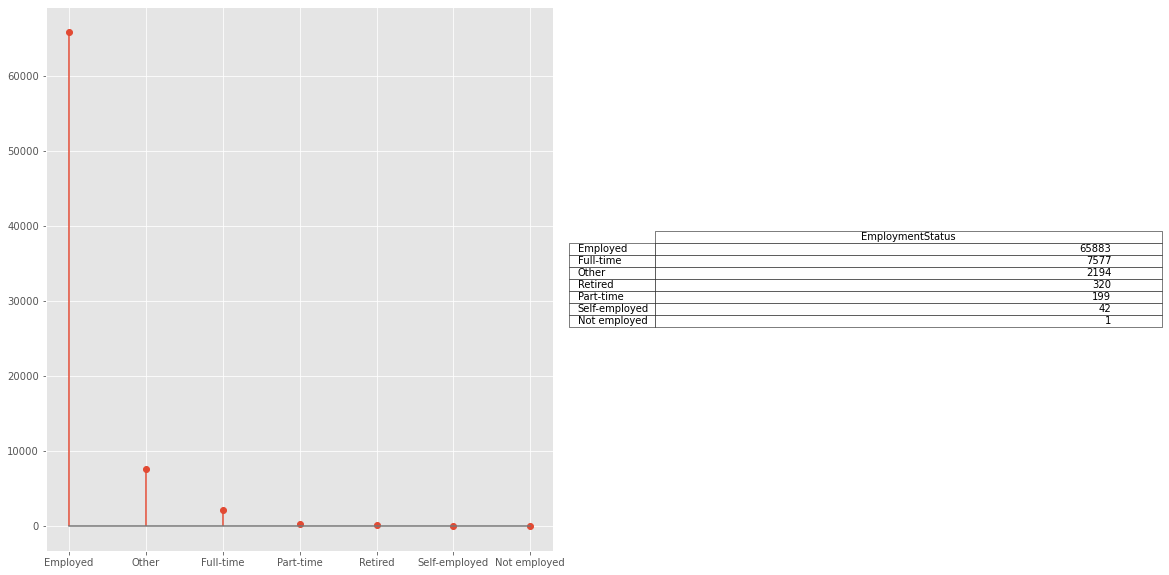

In [30]:
#Lollipop
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(121)
plt.stem(df["EmploymentStatus"].unique(), df["EmploymentStatus"].value_counts(), use_line_collection = True)

ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df["EmploymentStatus"].value_counts(), loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
plt.show()

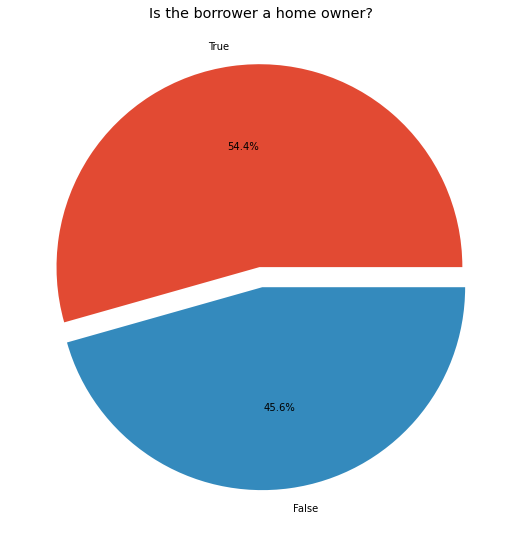

In [31]:
# The first consideration analyzes which rating was given most frequently
plt.style.use('ggplot')
ax = plt.subplot(121, aspect='equal')
plt.axis('off')
explode = (0.05, 0.05)
ax = df["IsBorrowerHomeowner"].value_counts().plot.pie(figsize=(20, 20), autopct='%1.1f%%', explode=explode)
ax.set_title("Is the borrower a home owner?")

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=10)

Text(0.5, 1.0, 'Income range of all occupations')

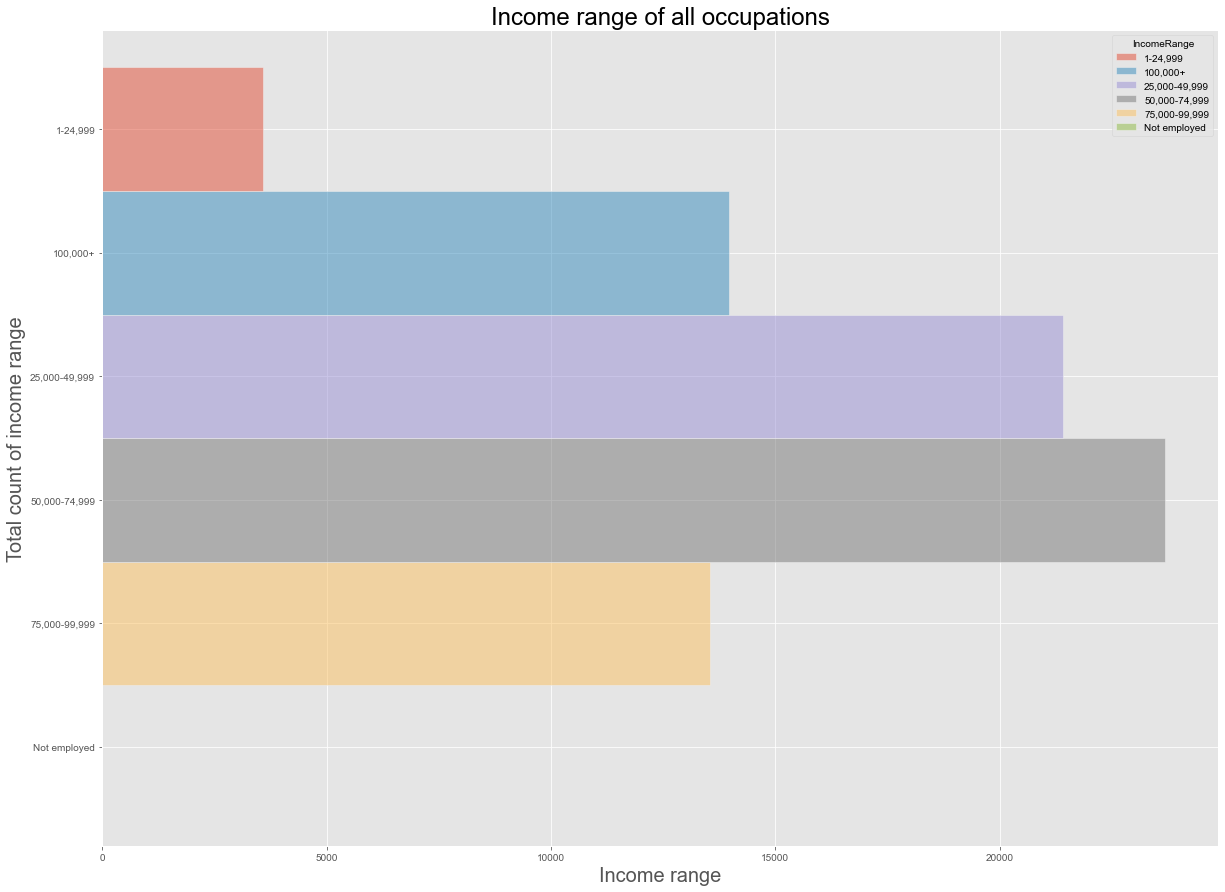

In [32]:
fig, ax = plt.subplots(figsize = (20, 15))

sb.histplot(data=df, y="IncomeRange", bins=6, hue="IncomeRange")
sb.set(font_scale = 2)

# Set label for x-axis
ax.set_xlabel("Income range" , size = 20 )
  
# Set label for y-axis
ax.set_ylabel("Total count of income range" , size = 20 )
  
# Set title for plot
ax.set_title("Income range of all occupations", size = 24)

> The second factor to consider is loan status. How many loans are still in the disbursement process and how many loans have already defaulted.

> Another important variable is the "employment status". From this it can be deduced in which employment the borrower is, how high the monthly loan installment is and whether the borrower can repay the loan installment

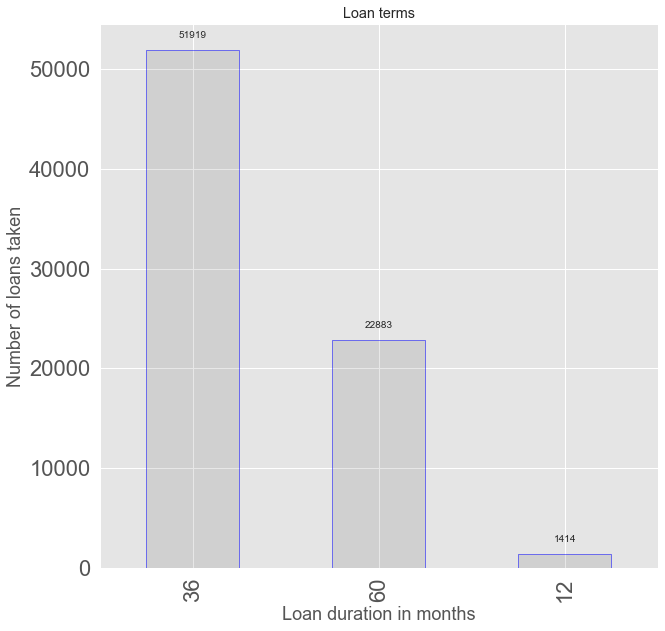

In [33]:
# Barplot
# In order to be able to successfully repay a loan, only the rating is enough, but also the monthly income. Here it is considered whether the borrower is employed
plt.style.use('ggplot')
ax = df["Term"].value_counts().plot.bar(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue', figsize=(10, 10))
ax.set_xlabel("Loan duration in months", fontsize=18)
ax.set_ylabel("Number of loans taken", fontsize=18)
ax.set_title("Loan terms")

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=10)

In [34]:
# The first consideration analyzes which rating was given most frequently
df_empl_dur_list = df["EmploymentStatusDuration"].tolist()

increment = 0
bins_list = []
interv_empl = max(df_empl_dur_list) / 10

for i in range(0, 10):
    increment = increment + interv_empl
    bins_list.append(increment) 

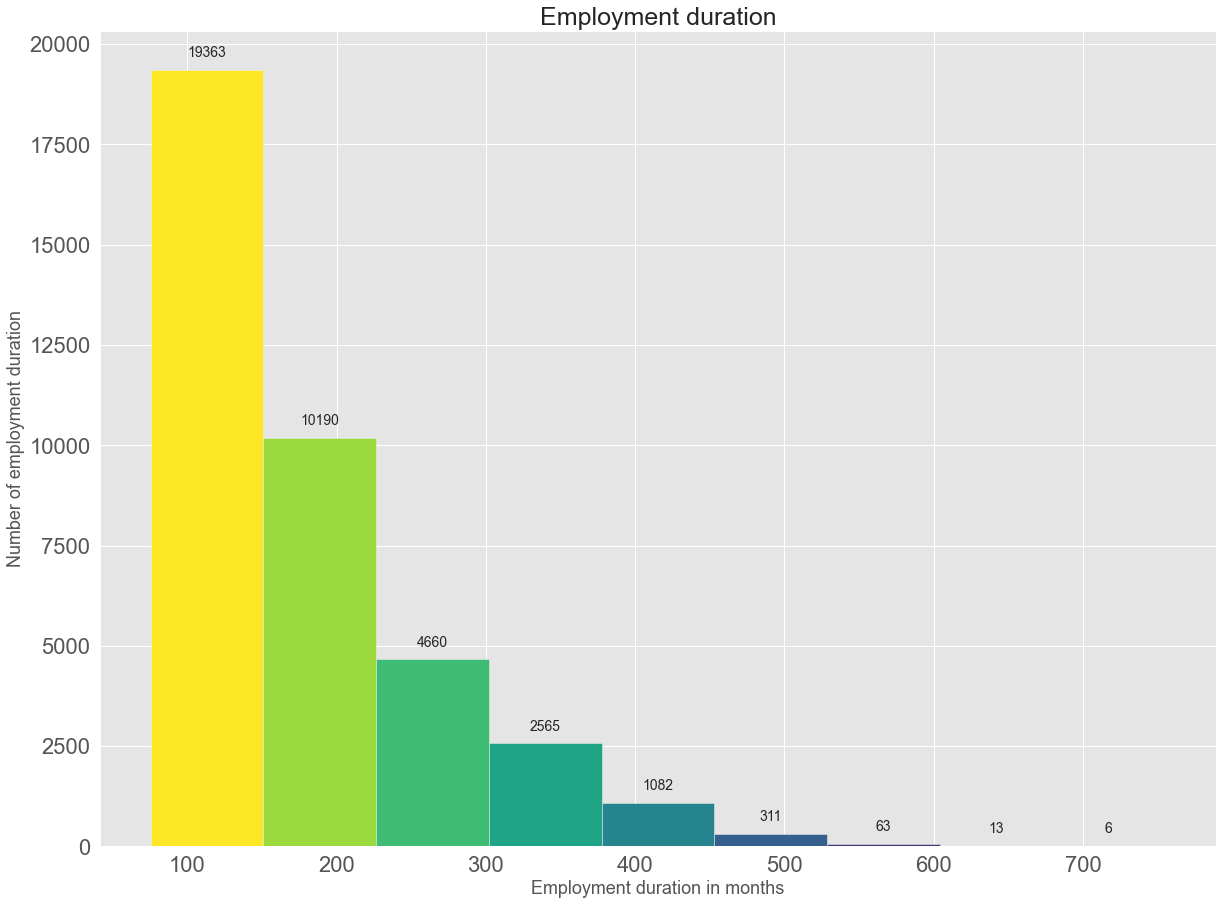

In [35]:
fig, ax = plt.subplots(figsize =(20, 15))
N, bins, patches = ax.hist(df_empl_dur_list, bins = bins_list)

# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel("Employment duration in months", fontsize=18)
plt.ylabel("Number of employment duration", fontsize=18)
plt.title('Employment duration',  fontsize=25)

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=10, rotation=0, fontsize=14)

### Distribution(s) of variable(s) of interest and unusual points.

> My analyzes did not provide any unusual results and no outliers could be identified either. Before data analysis, the data has already been cleaned and incomplete data removed. From this it can be concluded that no unusual data can be recognized by this measure and no data transformations were necessary. This is as a result of the data already been cleaned.



> The data analysis has shown that the largest rating with 21.6% is the "C group" and thus accounts for more than 1/5 of the borrowers. So I decided to focus on the "C Group" and the following charts will shed more light on that. As already mentioned above, a thorough data cleaning was carried out beforehand and thus any outliers or extraordinary data were removed

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

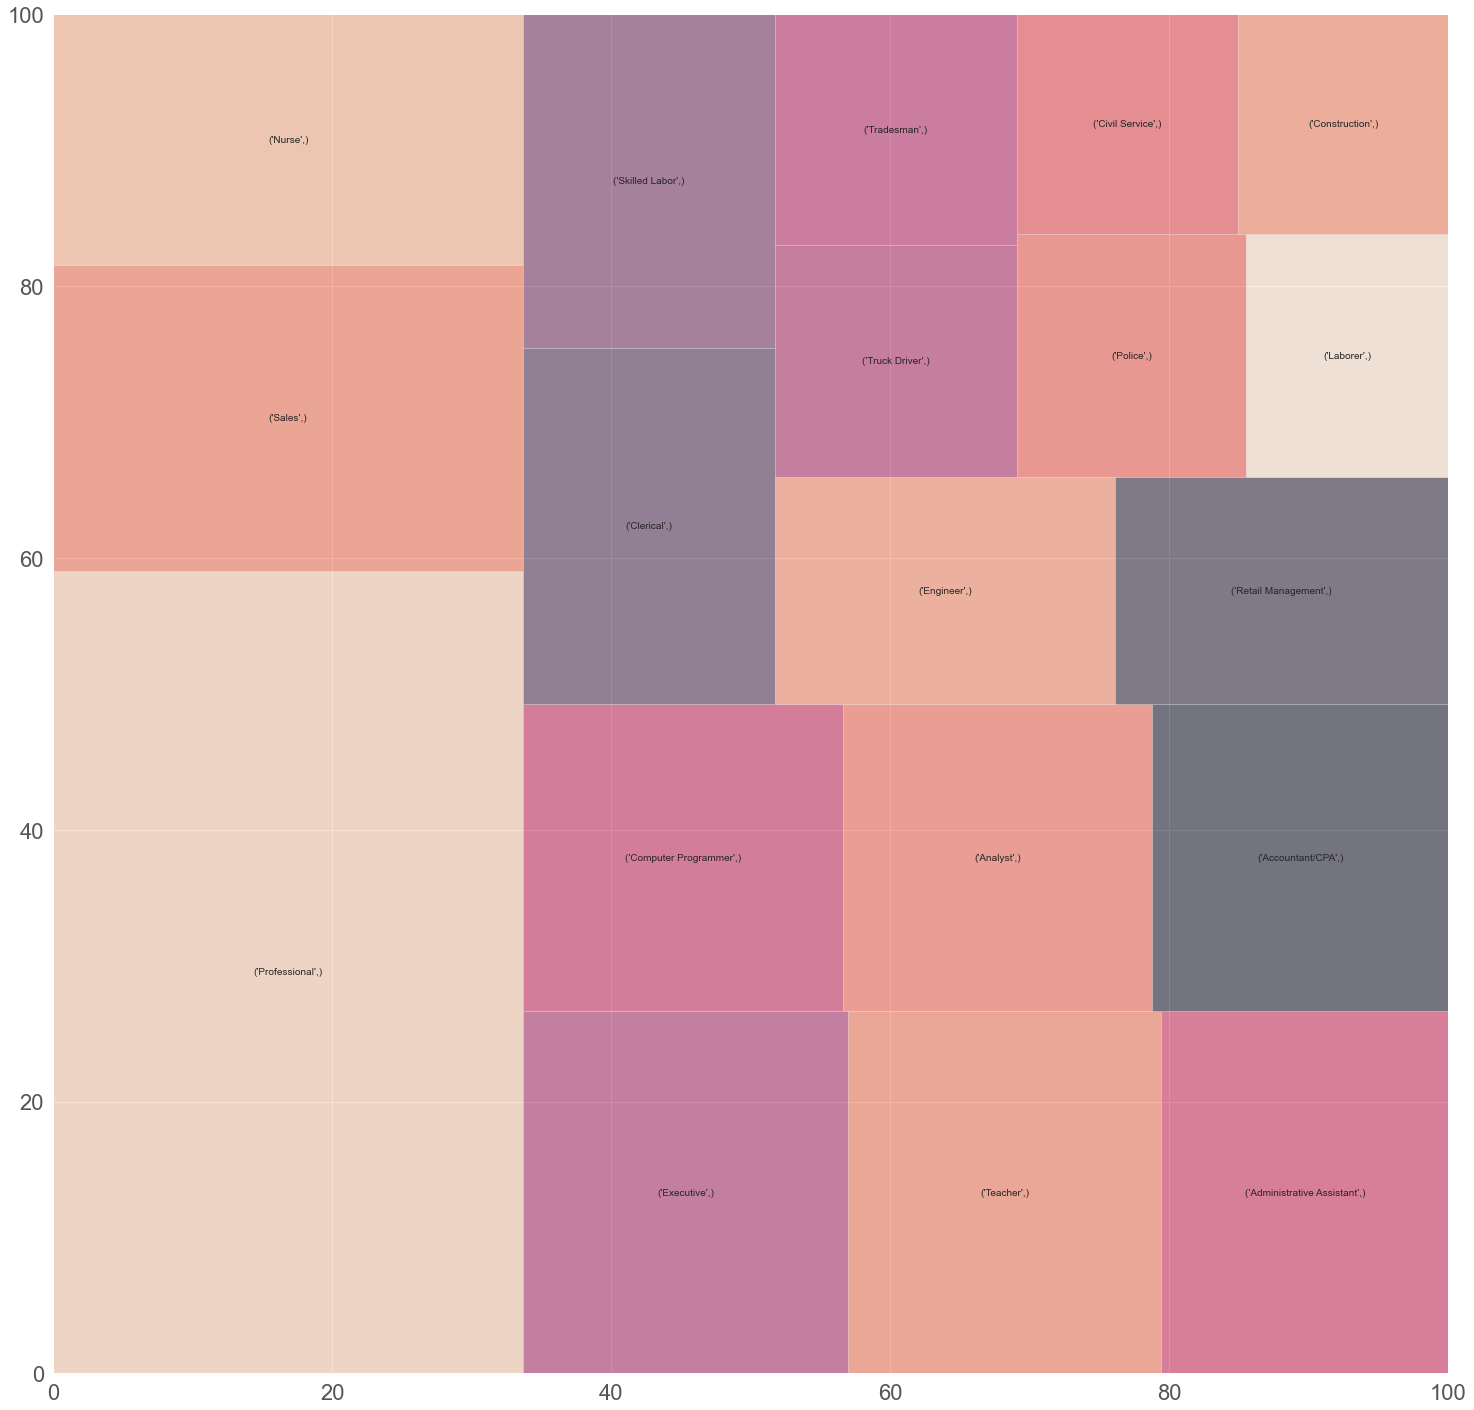

In [36]:
# The first visualization shows that the "C" rating was given most often. This rating grouping is now broken down further. 
# Now the question arises as to which occupations fall into this rating
# The largest rating group was broken down and it was found that the occupational group "Others" received the most C ratings.

df_occ_C = df[['Occupation']][df['ProsperRating (Alpha)'] == "C"].value_counts()

keys_List = list(df_occ_C.keys()[1:20])
values_List = df_occ_C.values.tolist()[1:20]

plt.style.use('ggplot')
plt.figure(figsize=(25,25))
squarify.plot(sizes=values_List, label=keys_List, alpha= 0.5)
plt.show()

### Employment Status

> Another important variable is the "employment status". From this it can be deduced in which employment the borrower is, how high the monthly loan installment is and whether the borrower can repay the loan installment

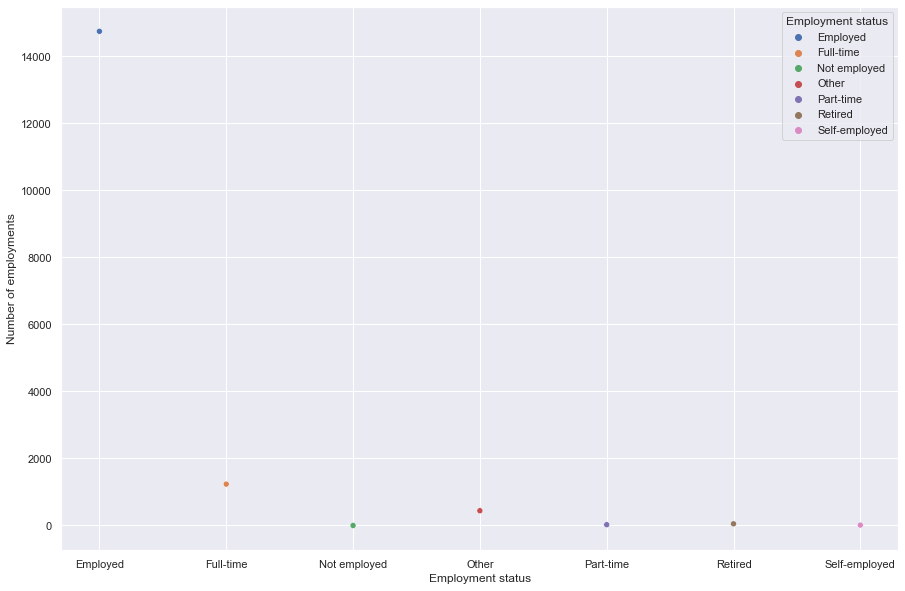

In [54]:
df_occ_EmployementStatus_series = df[['EmploymentStatus']][df['ProsperRating (Alpha)'] == "C"].value_counts()
keys_List = list(df_occ_EmployementStatus_series.keys())
values_List = df_occ_EmployementStatus_series.values.tolist()

df_occ_EmployementStatus = pd.DataFrame(df_occ_EmployementStatus_series)
df_occ_EmployementStatus = df_occ_EmployementStatus.reset_index()
df_occ_EmployementStatus.rename(columns={"EmploymentStatus": "Employment status", 0: 'Number of employments'}, inplace = True)

sb.scatterplot(y="Number of employments", x="Employment status",
                hue="Employment status",
                data=df_occ_EmployementStatus)
sb.set(rc={"figure.figsize":(11, 8)})

> It can be seen that the highest number of borrowers are employed. It can not be ascerntined the correlation between Employed and Full-Time/ Part-Time.

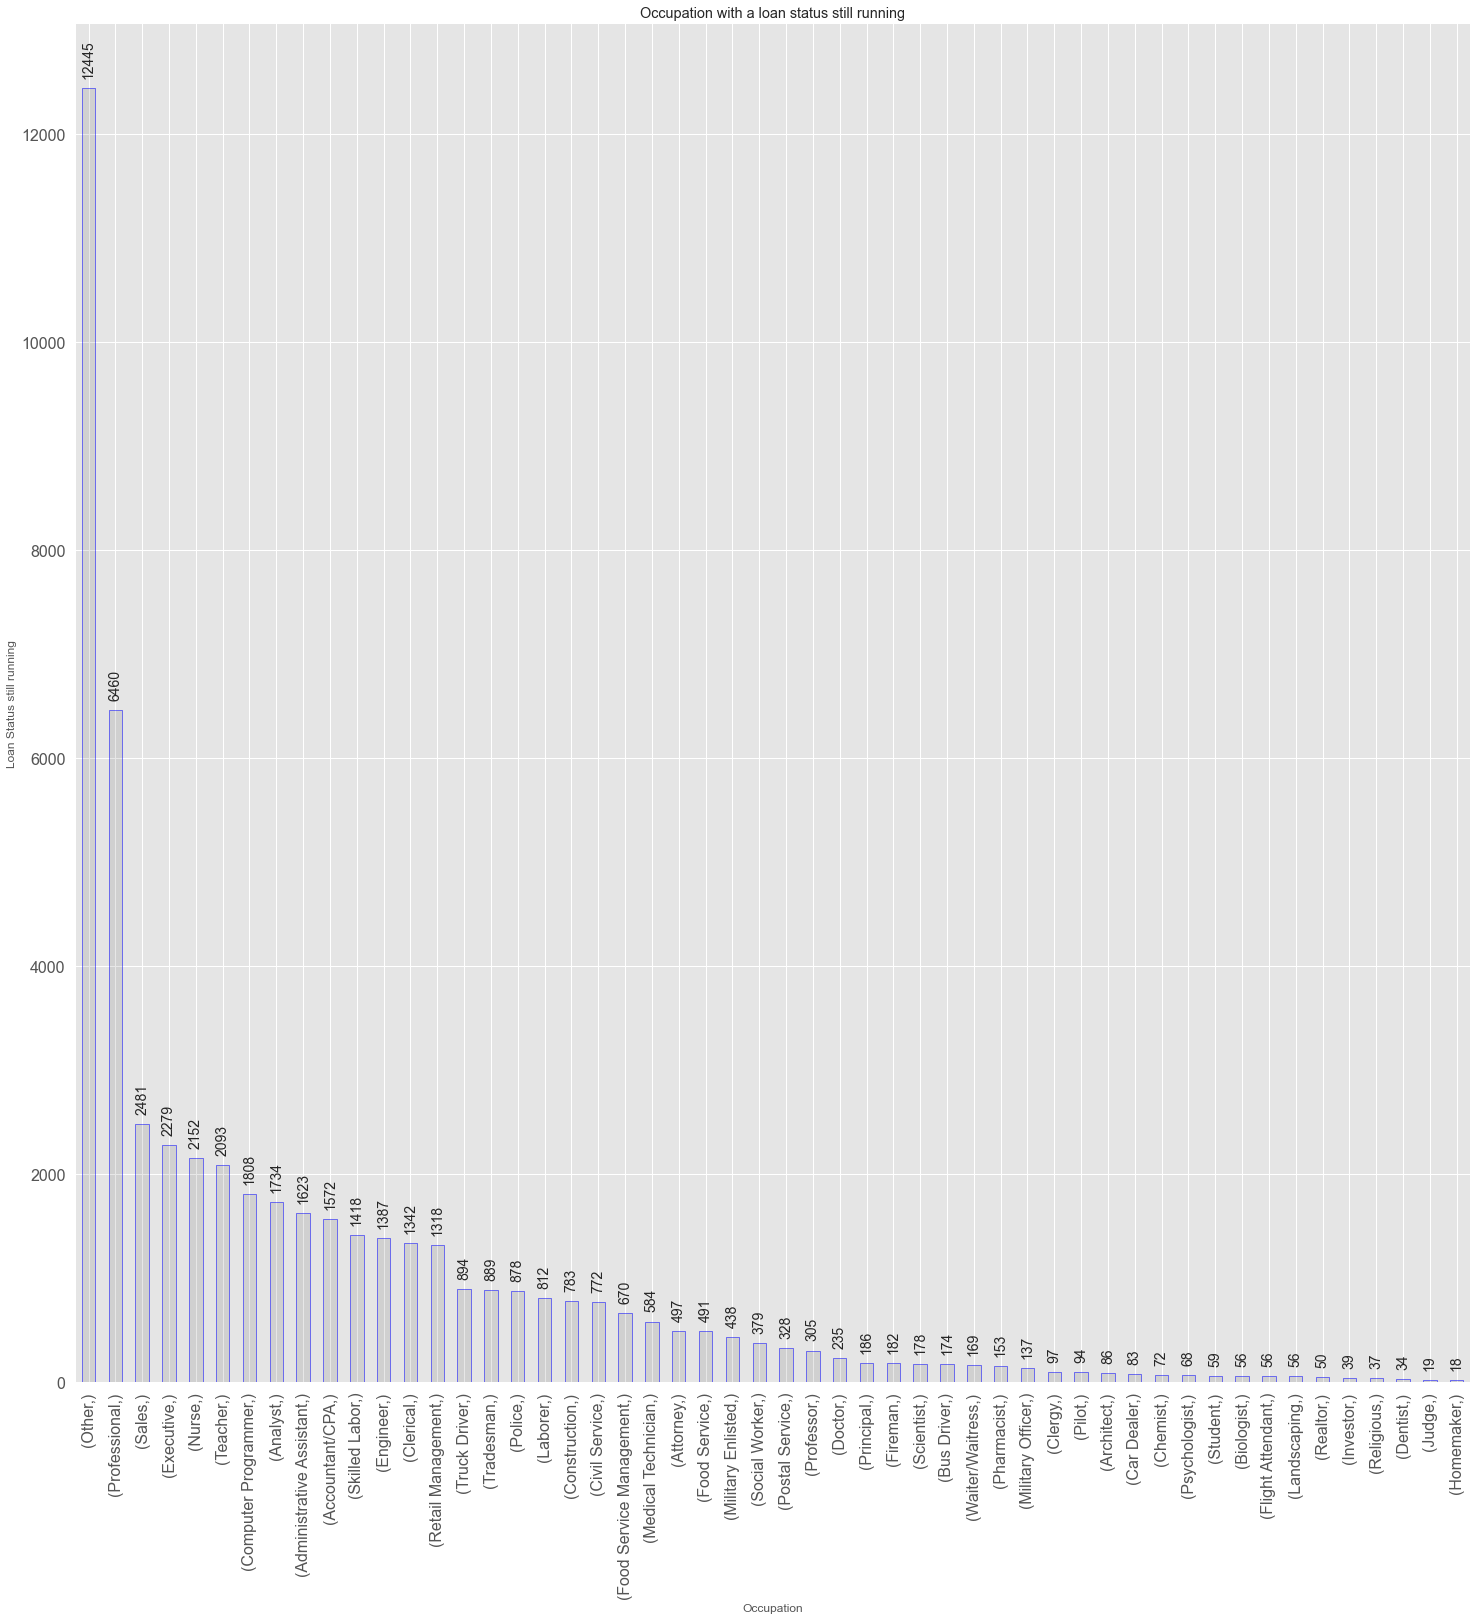

In [38]:
plt.style.use('ggplot')
ax_occ = df[['Occupation']] [df['LoanStatus'] == "Current"].value_counts().plot.bar(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue', figsize=(25, 25))
ax_occ.tick_params(labelsize=16)
ax_occ.set_xlabel("Occupation")
ax_occ.set_ylabel("Loan Status still running")
ax_occ.set_title("Occupation with a loan status still running")

for i in ax_occ.containers:
    ax_occ.bar_label(i, label_type='edge', padding=10, rotation=90, fontsize=14)

> The chart above shows the distribution of all occupations with running loan.

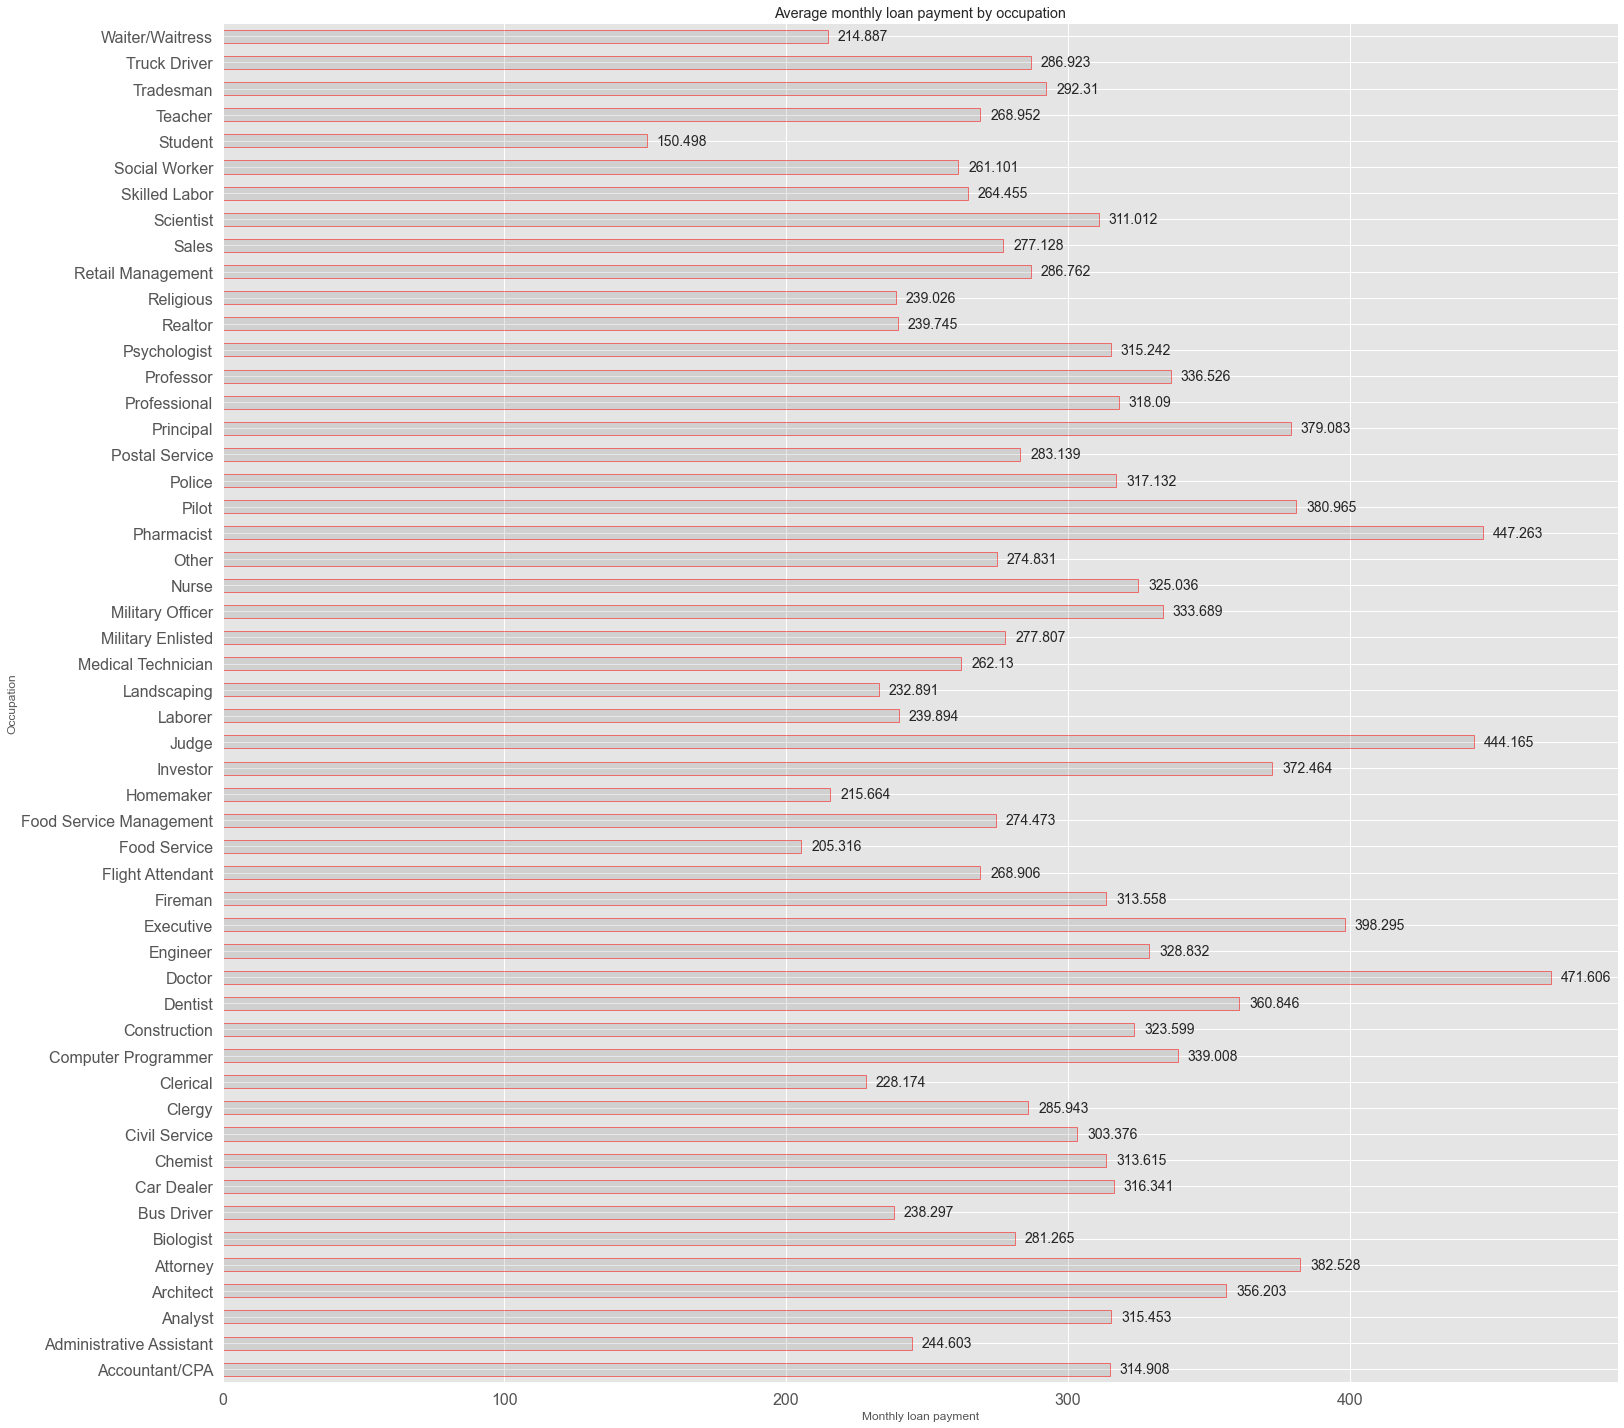

In [39]:
ax_occ = df.groupby('Occupation')['MonthlyLoanPayment'].mean().plot.barh(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='red', figsize=(25, 25))
ax_occ.tick_params(labelsize=16)
ax_occ.set_xlabel("Monthly loan payment")
ax_occ.set_ylabel("Occupation")
ax_occ.set_title("Average monthly loan payment by occupation")

for i in ax_occ.containers:
    ax_occ.bar_label(i, label_type='edge', padding=10, rotation=0, fontsize=14)

> Despite having 'other' as the largest occupation with running loan, same cannot be said with Average Monthly loan repayment. Statstics shows that Doctors have the hightest verage Monthly loan repayment followed by Judges and Pharmacist. It also shows that Student have the least repayment.

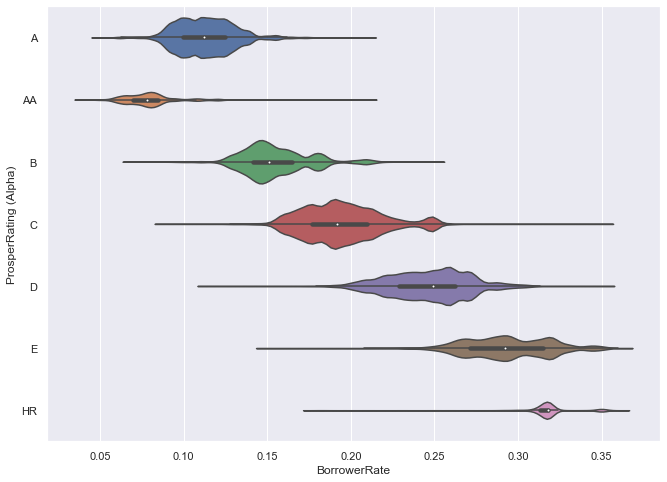

In [55]:
sb.violinplot(x=df["BorrowerRate"], y=df["ProsperRating (Alpha)"], scale="count")
sb.set(rc={'figure.figsize':(11,8)})

Text(0.5, 0, 'Numbers of loans taken')

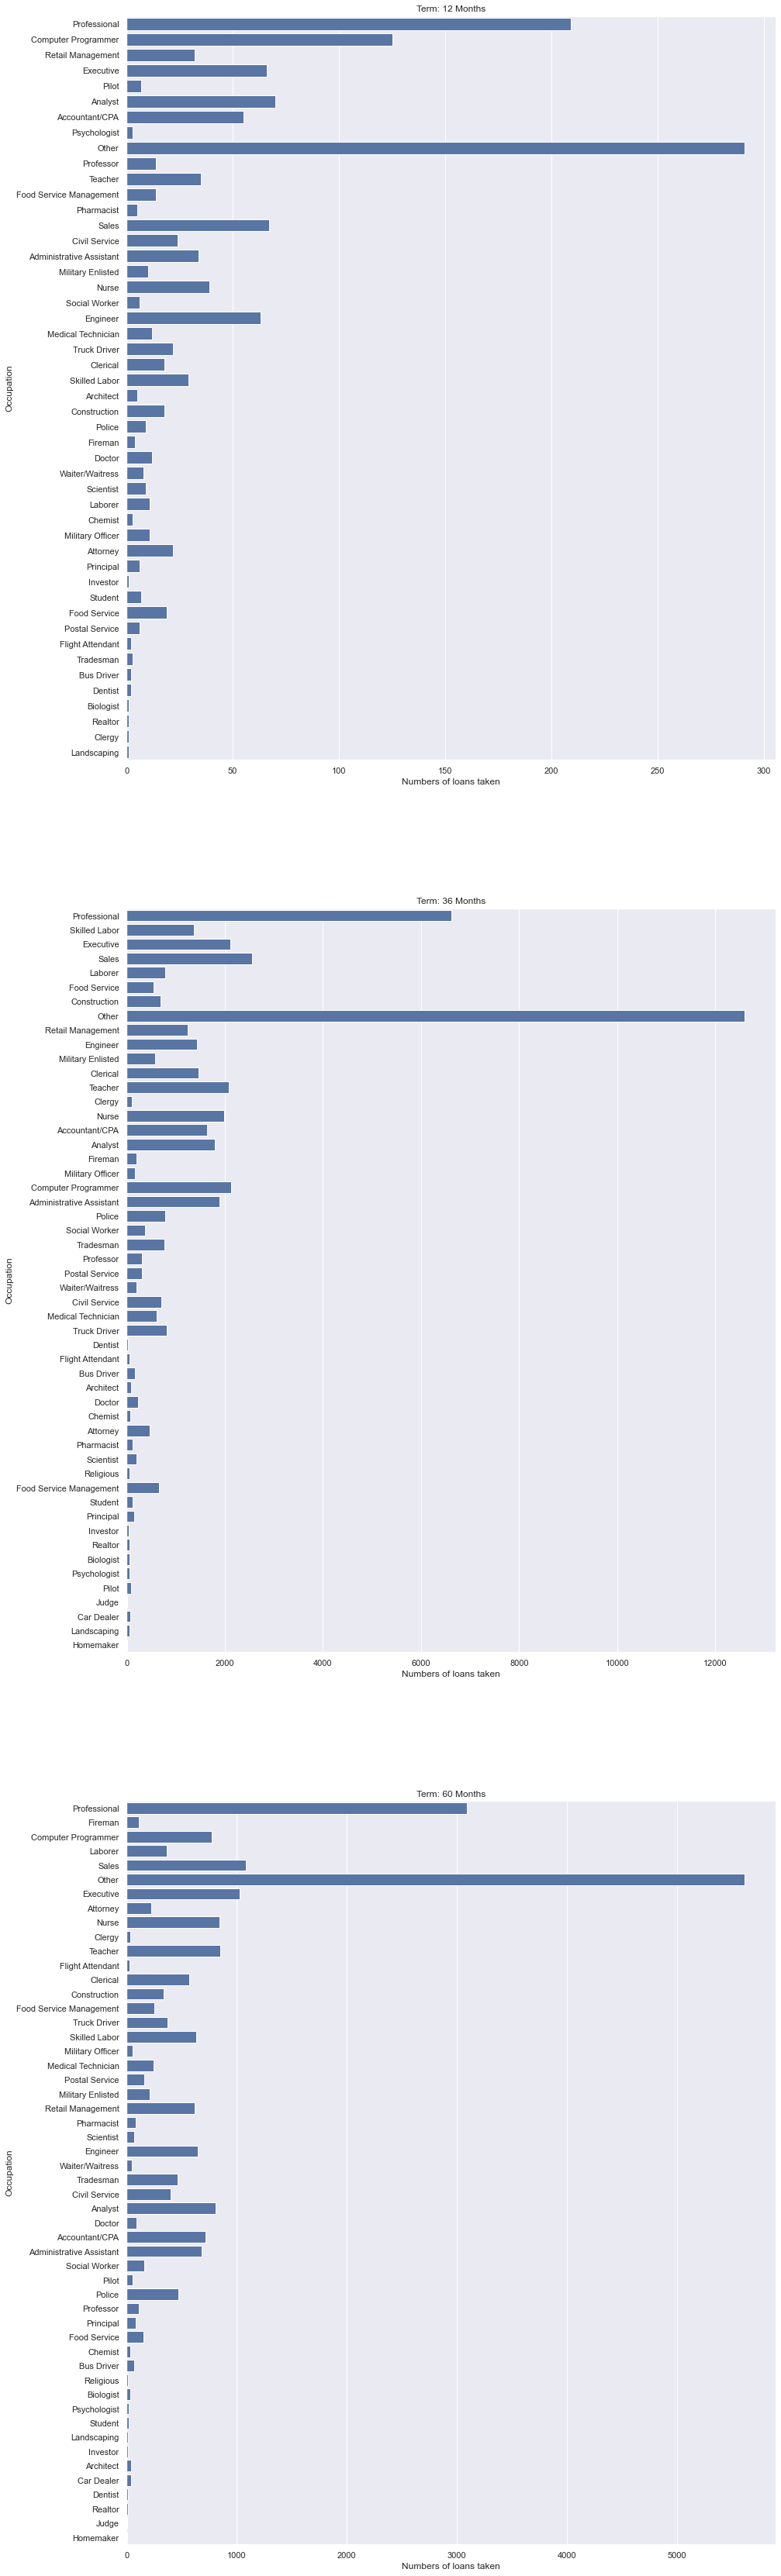

In [41]:
#Plotting three bar charts, to see which occupation favours which term
fig, ax= plt.subplots(nrows= 3, figsize= (15,60), sharex= False)

sb.countplot(data= df.query('Term==12'), y='Occupation', ax=ax[0], color = sb.color_palette()[0])
ax[0].set_title('Term: 12 Months')
ax[0].set_xlabel('Numbers of loans taken')

sb.countplot(data= df.query('Term==36'), y='Occupation', ax=ax[1], color = sb.color_palette()[0])
ax[1].set_title('Term: 36 Months')
ax[1].set_xlabel('Numbers of loans taken')

sb.countplot(data= df.query('Term==60'), y='Occupation', ax=ax[2], color = sb.color_palette()[0])
ax[2].set_title('Term: 60 Months')
ax[2].set_xlabel('Numbers of loans taken')

### Observations in the relationship. How did the feature(s) of interest vary with other features in the dataset?

> Taken from this basis, the first factor of the analysis was the "Prosper Rating (Alpha)". I found that majority of the borrowers fell under Prosper Rating Group C.

> The second factor considered was loan status (Current, completed, chargedoff, defaulted and past due date). It was deduced that 44.9% of the loan (51170 loans) are still running as at the time of analysis.

> On an average, the doctors repayment loan are much more higher than the rest of the ocuupations.

> Majority of the current loans running are taken by 'other' occupation.


## Multivariate Exploration

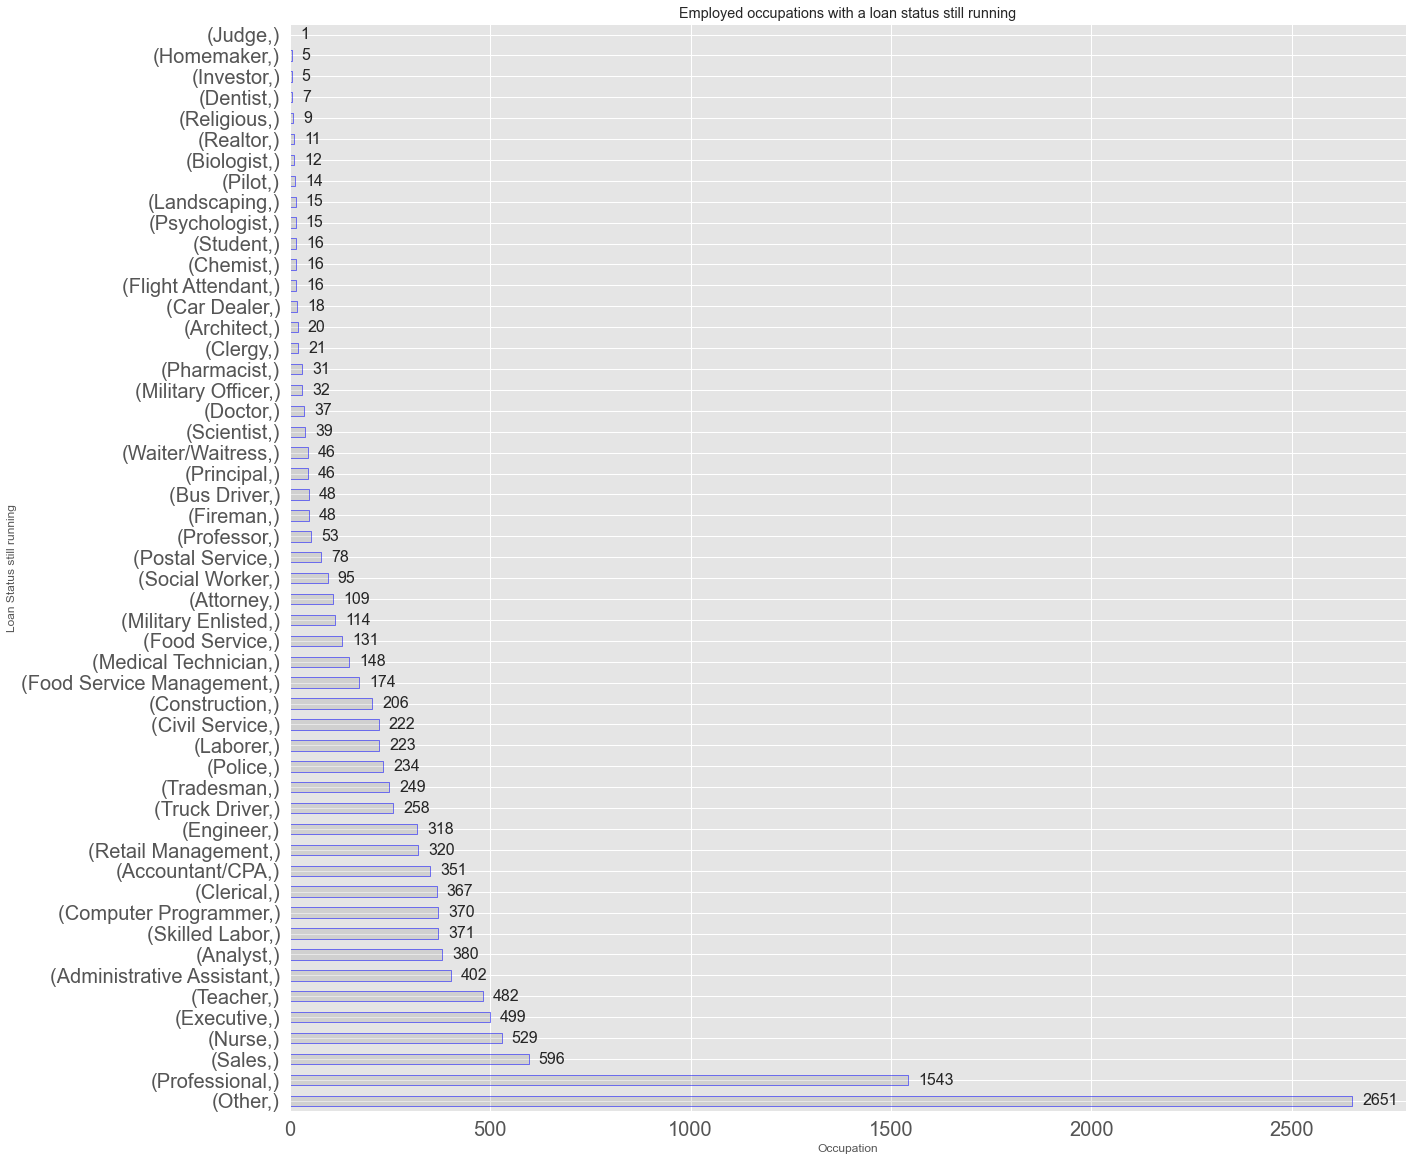

In [42]:
plt.style.use('ggplot')
ax_occ = df[['Occupation']][(df["LoanStatus"] == 'Current') & (df["EmploymentStatus"] == 'Employed') & (df["ProsperRating (Alpha)"] == 'C')].value_counts().plot.barh(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue', figsize=(20, 20))
ax_occ.tick_params(labelsize=20)
ax_occ.set_xlabel("Occupation")
ax_occ.set_ylabel("Loan Status still running")
ax_occ.set_title("Employed occupations with a loan status still running")

for i in ax_occ.containers:
    ax_occ.bar_label(i, label_type='edge', padding=10, rotation=0, fontsize=16)

In [43]:
plt.style.use('ggplot')
df_occ_ls_es_pr_series = df[['Occupation', 'LoanStatus']][(df["EmploymentStatus"] == 'Retired') & (df["ProsperRating (Alpha)"] == 'C')].value_counts()
df_occ_ls_es_pr = pd.DataFrame(df_occ_ls_es_pr_series)
df_occ_ls_es_pr = df_occ_ls_es_pr.reset_index()
df_occ_ls_es_pr.rename(columns={"Occupation": "Occupation","LoanStatus":"Loan status" ,  0: 'Number of retired occupation'}, inplace = True)

key_list_two = df_occ_ls_es_pr["Occupation"].to_list()
value_list_two = df_occ_ls_es_pr["Number of retired occupation"].to_list()
legend_list_two = df_occ_ls_es_pr["Loan status"].to_list()

df_occ_ls_es_pr

,Occupation,Loan status,Number of retired occupation
0,Other,Completed,25
1,Other,Current,18
2,Other,Chargedoff,4
3,Other,Defaulted,1
4,Other,Past Due (31-60 days),1
5,Police,Current,1


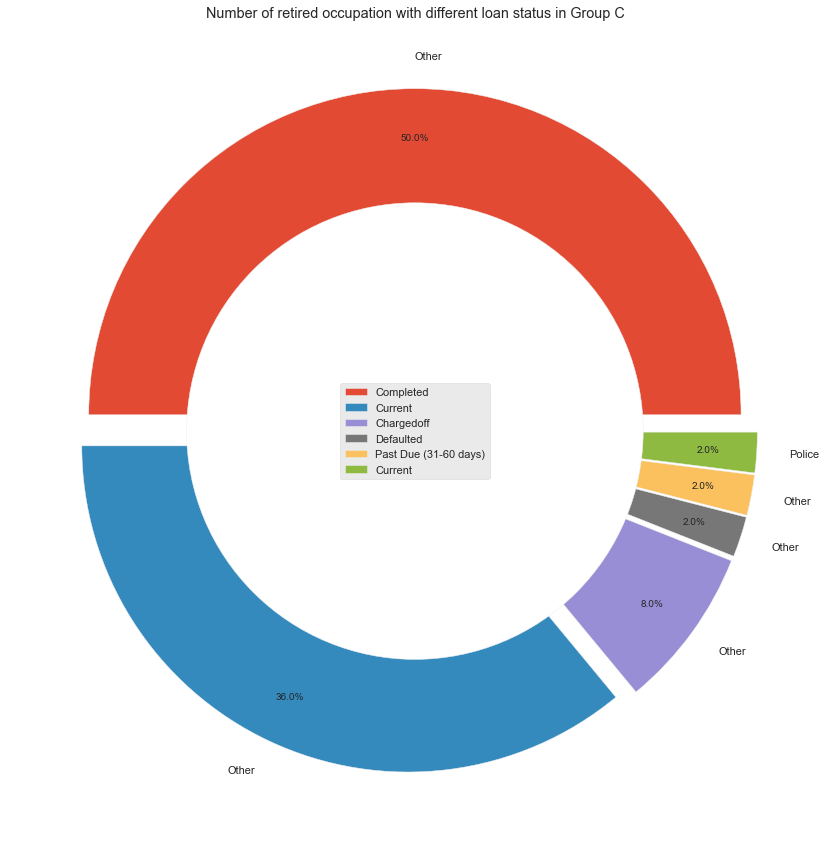

In [44]:
# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']

# explosion
explode_list = []
explode_tuple = []

for i in range(0, len(key_list_two)):
    explode_list.append(0.05)

explode = tuple(explode_list)
  
plt.figure(figsize=(15,15))

# Pie Chart
plt.pie(value_list_two, labels=key_list_two,
        autopct='%1.1f%%', pctdistance=0.85, explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.legend(legend_list_two, loc="center")

  
# Adding Title of chart
plt.title('Number of retired occupation with different loan status in Group C')
  
# Displaying Chart
plt.show()

> The variables of interest are Occupation with retired status, different loan status under Group C.

In [45]:
plt.style.use('ggplot')
df_occ_ls_es_pr_2_series = df[['Occupation', 'LoanStatus']][(df["EmploymentStatus"] == 'Self-employed') & (df["ProsperRating (Alpha)"] == 'C')].value_counts()
df_occ_ls_es_pr_2 = pd.DataFrame(df_occ_ls_es_pr_2_series)
df_occ_ls_es_pr_2 = df_occ_ls_es_pr_2.reset_index()
df_occ_ls_es_pr_2.rename(columns={"Occupation": "Occupation", "LoanStatus":"Loan status", 0: 'Number of self-employed occupation'}, inplace = True)

key_list_three = df_occ_ls_es_pr_2["Occupation"].to_list()
value_list_three = df_occ_ls_es_pr_2["Number of self-employed occupation"].to_list()
legend_list_three = df_occ_ls_es_pr_2["Loan status"].to_list()


df_occ_ls_es_pr_2

,Occupation,Loan status,Number of self-employed occupation
0,Other,Current,5
1,Sales,Current,3
2,Construction,Current,1
3,Landscaping,Current,1
4,Professional,Current,1
5,Tradesman,Current,1


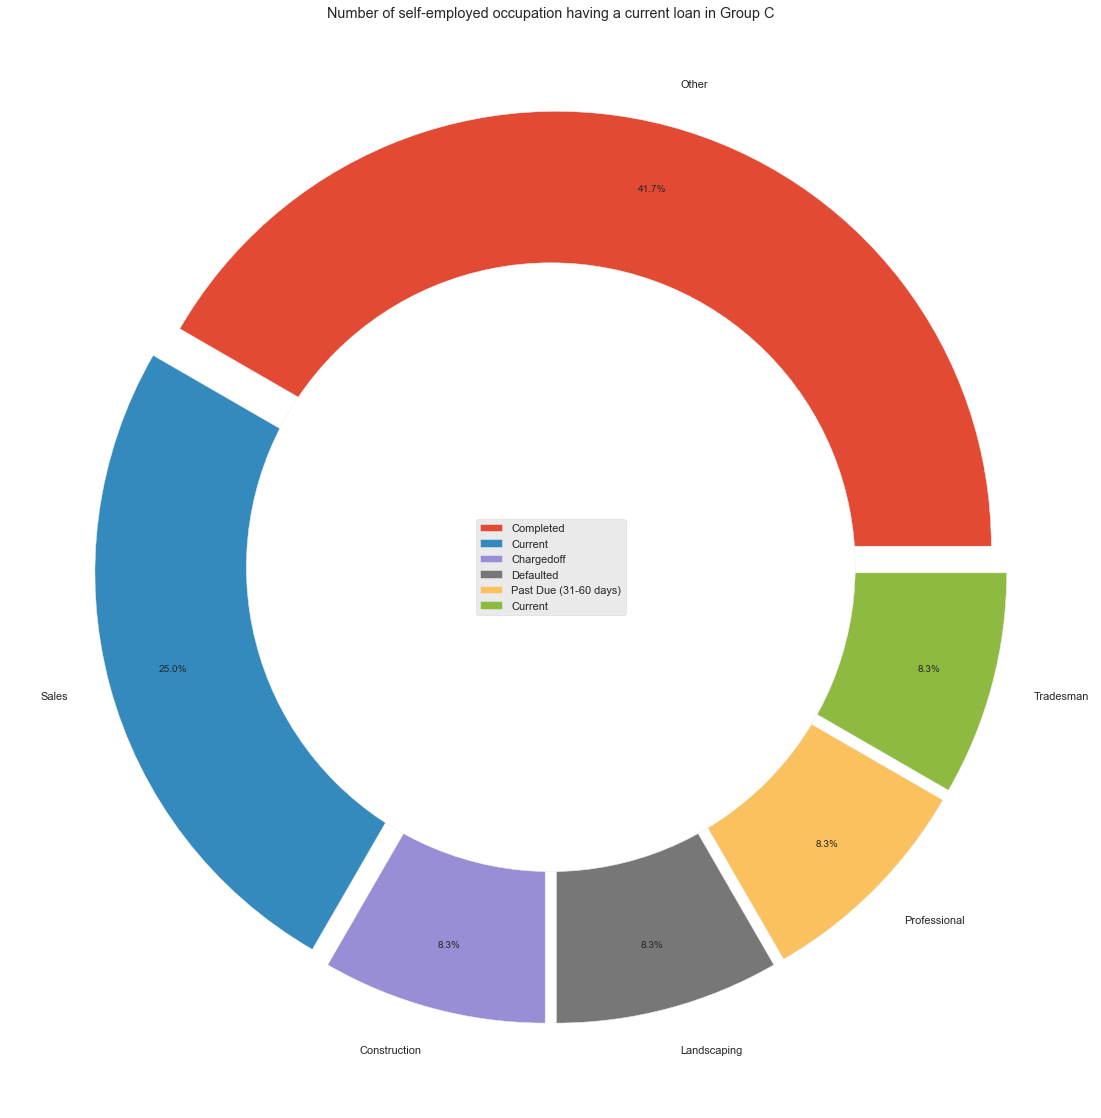

In [46]:
# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']

# explosion
explode_list = []
explode_tuple = []

for i in range(0, len(key_list_three)):
    explode_list.append(0.05)

explode = tuple(explode_list)
  
plt.figure(figsize=(20,20))

# Pie Chart
plt.pie(value_list_three, labels=key_list_three,
        autopct='%1.1f%%', pctdistance=0.85, explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.legend(legend_list_two, loc="center")
  
# Adding Title of chart
plt.title('Number of self-employed occupation having a current loan in Group C')
  
# Displaying Chart
plt.show()

> The variables of interest are Occupation with self-employed status, with a running/current loan status under Group C.

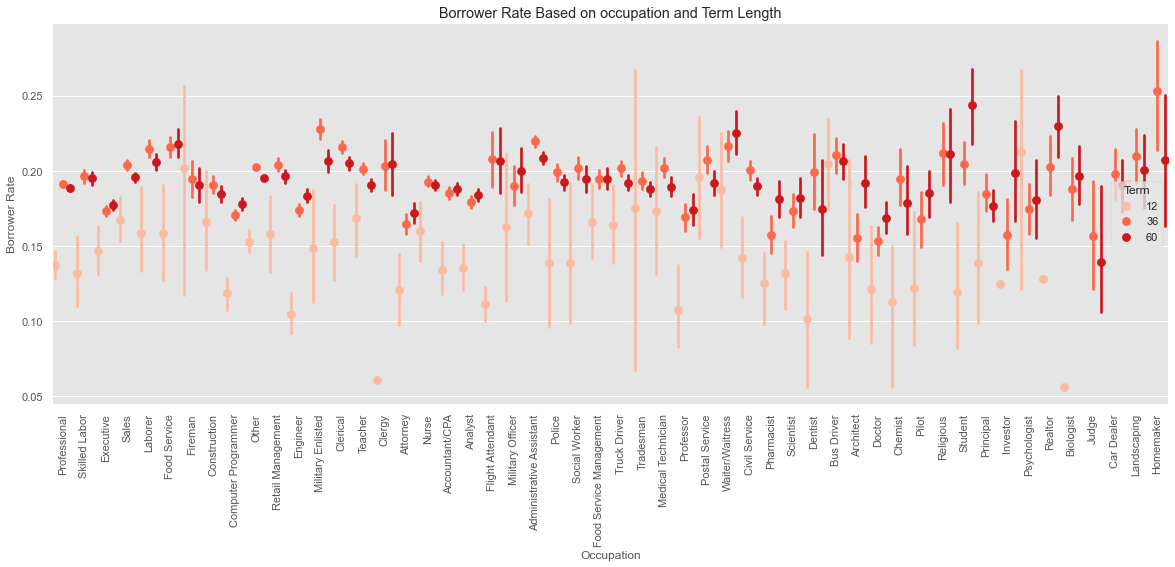

In [47]:
#bar plot for Borrower Rate Based on Listing Category and Term Length
fig = plt.figure(figsize = [20,7])
ax = sb.pointplot(data = df, x = 'Occupation', y = 'BorrowerRate',  hue = 'Term',
           palette = 'Reds', linestyles = '', dodge = 0.7)
plt.title('Borrower Rate Based on occupation and Term Length')
plt.xlabel('Occupation')
plt.ylabel('Borrower Rate')
plt.xticks(rotation = 90)
ax.legend(loc='center right', title='Term')
plt.show();

> The plot above shows that majority of borrowers go for longer term with an average of 0.20 Borrower rate.

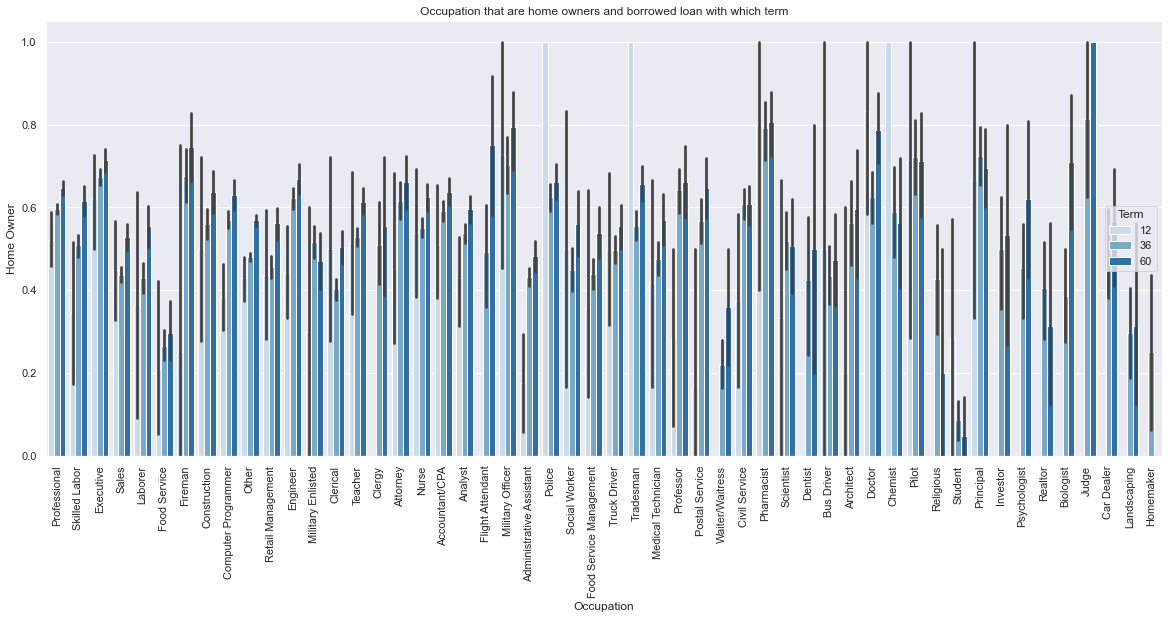

In [57]:
#bar plot for Loan Amount Based on Term Length and Listing Category
fig = plt.figure(figsize = [20,8])
ax = sb.barplot(data = df, x = 'Occupation', y = 'IsBorrowerHomeowner',  hue = 'Term', palette = 'Blues')
plt.title('Occupation that are home owners and borrowed loan with which term')
plt.xlabel('Occupation')
plt.ylabel('Home Owner')
plt.xticks(rotation = 90)
ax.legend(loc='center right', title='Term')
plt.show();

### Features that strengthened each other in terms of looking at my feature(s) of interest

> Occupation, and loan status were varied while keeping the largest proper rating group C constant. 
> special relationships were established between employed, retired and self-employed based on the visualization

### Interesting or surprising interactions between features

> Majority of retired occupation under Group C fell as 'Other' and have repaid their loan while having only Police as an retired occupation still running a loan.

## Conclusions

> One of the most important factors in borrowing is the way Prosper rate their borrowers. Depending on the rating, it is decided how high the interest repayment will be. The credit rating classification is also an indicator that the borrower is either likely to be able to repay the loan or is highly likely to default on the loan. Taken from this basis, the first factor of the analysis was the "Prosper Rating (Alpha)". I found that majority of the borrowers fell under Prosper Rating Group C.

> The second factor considered was loan status (Current, completed, chargedoff, defaulted and past due date). It was deduced that 44.9% of the loan (51170 loans) are still running as at the time of analysis.
Another important variable is the "employment status". From this it can be deduced in which employment the borrower is, how high the monthly loan installment is and whether the borrower can repay the loan installment

> Next is to explore further.

>The focus on the presentation will be for retired people and their distributions across the rating, borrowers rate and loan instalment.
Effect of retirement on the prosper loan rating
Monthly loan instalment for retired people
Borrowers rate for retired people
